In [39]:
#pip install librosa

In [40]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
%matplotlib inline

#Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Now we'll create headers as per our requirement

In [41]:
header = 'filename chroma_stft chroma_stft_var rmse rmse_var spectral_centroid spectral_centroid_var spectral_bandwidth spectral_bandwidth_var rolloff rolloff_var zero_crossing_rate zero_crossing_rate_var'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

## Now we'll create all the features

In [42]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)


In [43]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rmse)} {np.var(rmse)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

# Now we have created the dataset with data.csv filename

## Preprocessing of data

In [44]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,chroma_stft_var,rmse,rmse_var,spectral_centroid,spectral_centroid_var,spectral_bandwidth,spectral_bandwidth_var,rolloff,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.088760,0.130225,0.002829,1784.420446,129789.689238,2002.650192,85897.037189,3806.485316,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.094981,0.095918,0.002373,1529.835316,375984.023922,2038.617579,213794.462833,3548.820207,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.085287,0.175573,0.002748,1552.481958,156526.317715,1747.165985,76046.707240,3040.514948,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.094009,0.141191,0.006339,1070.119953,184498.418348,1596.333948,166561.564811,2185.028454,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.087850,0.091563,0.002304,1835.494603,343350.842007,1748.362448,88466.013315,3580.945013,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   filename                1000 non-null   object 
 1   chroma_stft             1000 non-null   float64
 2   chroma_stft_var         1000 non-null   float64
 3   rmse                    1000 non-null   float64
 4   rmse_var                1000 non-null   float64
 5   spectral_centroid       1000 non-null   float64
 6   spectral_centroid_var   1000 non-null   float64
 7   spectral_bandwidth      1000 non-null   float64
 8   spectral_bandwidth_var  1000 non-null   float64
 9   rolloff                 1000 non-null   float64
 10  rolloff_var             1000 non-null   float64
 11  zero_crossing_rate      1000 non-null   float64
 12  zero_crossing_rate_var  1000 non-null   float64
 13  mfcc1                   1000 non-null   float64
 14  mfcc2                   1000 non-null   f

## Dropping unnecessary column

In [46]:
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,chroma_stft_var,rmse,rmse_var,spectral_centroid,spectral_centroid_var,spectral_bandwidth,spectral_bandwidth_var,rolloff,rolloff_var,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.088760,0.130225,0.002829,1784.420446,129789.689238,2002.650192,85897.037189,3806.485316,9.016619e+05,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,0.094981,0.095918,0.002373,1529.835316,375984.023922,2038.617579,213794.462833,3548.820207,2.976486e+06,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,0.085287,0.175573,0.002748,1552.481958,156526.317715,1747.165985,76046.707240,3040.514948,7.831159e+05,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,0.094009,0.141191,0.006339,1070.119953,184498.418348,1596.333948,166561.564811,2185.028454,1.494250e+06,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,0.087850,0.091563,0.002304,1835.494603,343350.842007,1748.362448,88466.013315,3580.945013,1.572304e+06,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chroma_stft             1000 non-null   float64
 1   chroma_stft_var         1000 non-null   float64
 2   rmse                    1000 non-null   float64
 3   rmse_var                1000 non-null   float64
 4   spectral_centroid       1000 non-null   float64
 5   spectral_centroid_var   1000 non-null   float64
 6   spectral_bandwidth      1000 non-null   float64
 7   spectral_bandwidth_var  1000 non-null   float64
 8   rolloff                 1000 non-null   float64
 9   rolloff_var             1000 non-null   float64
 10  zero_crossing_rate      1000 non-null   float64
 11  zero_crossing_rate_var  1000 non-null   float64
 12  mfcc1                   1000 non-null   float64
 13  mfcc2                   1000 non-null   float64
 14  mfcc3                   1000 non-null   f

## Label Encoding

In [48]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

## Normalizing the dataset

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

## Splitting the dataset into training and testing

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=100)

## Creating a model

In [51]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

## Prediction and Evaluation

### SVM Model

In [52]:
prediction = model.predict(X_test)
type(prediction)

numpy.ndarray

In [53]:
prediction[170]

4

In [54]:
type(y_test)

numpy.ndarray

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        37
           1       0.94      0.88      0.91        52
           2       0.62      0.49      0.55        47
           3       0.36      0.71      0.48        34
           4       0.69      0.51      0.59        43
           5       0.76      0.71      0.74        45
           6       0.86      0.78      0.82        41
           7       0.75      0.66      0.70        32
           8       0.51      0.59      0.55        37
           9       0.54      0.44      0.48        32

    accuracy                           0.66       400
   macro avg       0.67      0.65      0.65       400
weighted avg       0.69      0.66      0.66       400



In [57]:
print(confusion_matrix(y_test,prediction))

[[26  0  1  2  1  2  3  0  0  2]
 [ 0 46  1  1  0  1  0  0  1  2]
 [ 4  0 23  8  0  6  0  1  2  3]
 [ 0  0  1 24  4  0  1  1  1  2]
 [ 1  0  1  8 22  0  0  3  8  0]
 [ 3  3  4  0  0 32  0  0  2  1]
 [ 4  0  1  3  0  0 32  0  1  0]
 [ 0  0  2  6  1  0  0 21  2  0]
 [ 0  0  2  5  4  1  0  1 22  2]
 [ 1  0  1 10  0  0  1  1  4 14]]


### Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59        37
           1       0.92      0.85      0.88        52
           2       0.65      0.47      0.54        47
           3       0.47      0.68      0.55        34
           4       0.66      0.67      0.67        43
           5       0.65      0.67      0.66        45
           6       0.82      0.78      0.80        41
           7       0.82      0.72      0.77        32
           8       0.56      0.59      0.58        37
           9       0.37      0.41      0.39        32

    accuracy                           0.65       400
   macro avg       0.65      0.64      0.64       400
weighted avg       0.66      0.65      0.65       400



### KNN 

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        37
           1       0.88      0.88      0.88        52
           2       0.65      0.51      0.57        47
           3       0.33      0.56      0.41        34
           4       0.57      0.47      0.51        43
           5       0.63      0.53      0.58        45
           6       0.88      0.73      0.80        41
           7       0.62      0.56      0.59        32
           8       0.42      0.43      0.43        37
           9       0.50      0.62      0.56        32

    accuracy                           0.60       400
   macro avg       0.61      0.59      0.59       400
weighted avg       0.63      0.60      0.61       400



#### Choosing a K value

In [66]:
error_rate=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

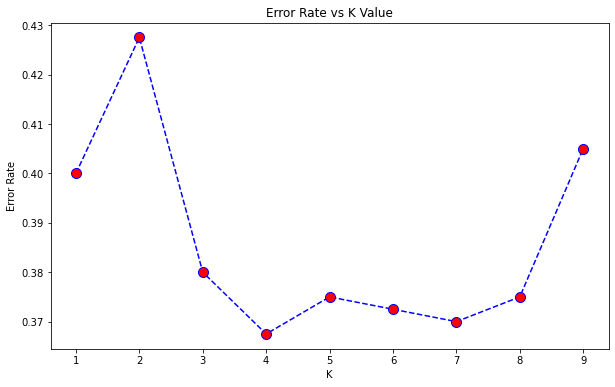

In [67]:
plt.figure(figsize = (10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Keras

In [68]:
!pip install keras

You should consider upgrading via the 'C:\Users\Dell\anaconda3\python.exe -m pip install --upgrade pip' command.


In [69]:
import keras

In [70]:
from keras import models
from keras import layers

In [71]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
5/5 [==============================] - 1s 2ms/step - loss: 2.2798 - accuracy: 0.1769
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 1.9389 - accuracy: 0.3706
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 1.7232 - accuracy: 0.4173
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 1.5273 - accuracy: 0.4671
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 1.3373 - accuracy: 0.5484
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 1.2207 - accuracy: 0.5748
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 1.0911 - accuracy: 0.6216
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.9840 - accuracy: 0.6713
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.9133 - accuracy: 0.6810
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.8660 - accuracy: 0.7293
Epoch 11/20
5/5 [======================

#### Calculate Accuracy

In [74]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

13/13 [==============================] - 0s 1ms/step - loss: 1.0293 - accuracy: 0.6550
test_acc:  0.6549999713897705


#### Predictions

In [75]:
predictions = model.predict(X_test)
np.argmax(predictions[70])

1